# Homework 7

In [1]:
import numpy as np

1. For `x = np.array([True, False])` and `y = np.array([True, True])`, calculate `~x`, `x & y` and `x | y`. What is the meaning of these operations?

In [2]:
x = np.array([True, False])
y = np.array([True, True])

In [3]:
~x

array([False,  True])

In [4]:
x & y

array([ True, False])

In [5]:
x | y

array([ True,  True])

2. Plot together the curves $y = x^3 + x^2 - 3^x +1$ and $y = -x^3 + 0.5\,x^2 + x + 1$ in the interval $-2 \le x \le 2$.

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 200)

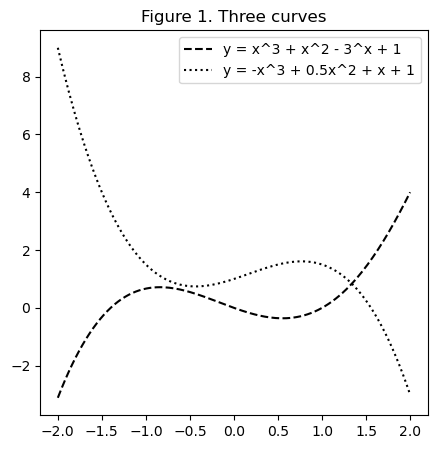

In [7]:
plt.figure(figsize=(5,5))
plt.title('Figure 1. Three curves')
plt.plot(x, x**3 + x**2 - 3**x + 1, label='y = x^3 + x^2 - 3^x + 1', color='black', linestyle='dashed')
plt.plot(x, -x**3 + 0.5*x**2 + x + 1, label='y = -x^3 + 0.5x^2 + x + 1', color='black', linestyle='dotted')
plt.legend();

3. Real data frequently comes with **missing values**. The designers of NumPy allowed for this creating `np.nan`, which has data type `float`. This value has to be handled with care. To get an idea oh it works, calculate `np.nan + 3`, `np.nan < 3`, `np.nan == np.nan` and `np.nan <= np.nan`. Can you explain all the results obtained?


In [8]:
np.nan + 3

nan

In [9]:
np.nan < 3

False

In [10]:
np.nan == np.nan

False

In [11]:
np.nan <= np.nan

False

4. In the stock market, the **daily return** is the percentage change in the price of a specific company's shares with respect to the preceding trading day. If which can be multiplied by 100 to get percentage scale. The list `msft_price`, given below, contains the opening prices of Microsoft stock in the NASDAQ market, from September 5th to October 3rd of 2023 (only trading days), in US dollars. Calculate a 1D array containing the daily returns. Note that there will be no return for September 5th, because you are not given the price for the preceding day.
```
msft_price = [329.00, 333.38, 331.29, 330.09, 337.24, 335.82, 331.31, 339.15, 336.92, 327.80,
    326.17, 329.51, 319.26, 321.32, 316.59, 315.13, 312.30, 310.99, 317.75, 316.28, 320.83])
```

In [12]:
msft_price = [329.00, 333.38, 331.29, 330.09, 337.24, 335.82, 331.31, 339.15, 336.92, 327.80, 326.17, 329.51, 319.26, 321.32, 316.59, 315.13, 312.30, 310.99, 317.75, 316.28, 320.83]

In [13]:
msft_price_np = np.array(msft_price)
rt = msft_price_np[1:] / msft_price_np[:-1] - 1
(100 * rt).round(2)

array([ 1.33, -0.63, -0.36,  2.17, -0.42, -1.34,  2.37, -0.66, -2.71,
       -0.5 ,  1.02, -3.11,  0.65, -1.47, -0.46, -0.9 , -0.42,  2.17,
       -0.46,  1.44])

Optional, if we want to show the % sign on every element, we need to convert it to a string.

In [14]:
rt_string = (100 * rt).round(2).astype('str')
np.char.add(rt_string, '%') 

array(['1.33%', '-0.63%', '-0.36%', '2.17%', '-0.42%', '-1.34%', '2.37%',
       '-0.66%', '-2.71%', '-0.5%', '1.02%', '-3.11%', '0.65%', '-1.47%',
       '-0.46%', '-0.9%', '-0.42%', '2.17%', '-0.46%', '1.44%'],
      dtype='<U33')

5. In the first question of the homework of lecture PY-05, you wrote a function which takes the height and the weight (single numbers, not vectors) and returns a **categorization** of the BMI. Can you modify that function so it takes a vector of heights and a vector of weights and returns a vector of categorized BMI's? Note that what you need is a **vectorized function**.

In [15]:
def categorize(h, w):
    bmi = float(w)/(float(h)**2)
    if bmi >= 30.0:
        return bmi, 'obese'
    elif bmi >= 25.0:
        return bmi, 'overweight'
    elif bmi >= 18.5:
        return bmi, 'normal weight'
    else:
        return bmi, 'underweight'

vectorized_categorize = np.vectorize(categorize)

In [16]:
height = np.array([1.65, 1.73, 1.51, 1.63, 1.69, 1.7, 1.81, 1.66, 1.58, 1.66, 1.62, 1.81, 1.75, 1.65, 1.65])
weight = np.array([61.6, 59.5, 46.5, 75.3, 47.6, 80.2, 67.5, 64.1, 69.5, 57.0, 68.6, 69.3, 53.2, 66.1, 50.6])

In [17]:
vectorized_categorize(height, weight)

(array([22.62626263, 19.88038357, 20.39384238, 28.34130001, 16.66608312,
        27.75086505, 20.60376667, 23.26172159, 27.84008973, 20.68515024,
        26.13930803, 21.15320045, 17.37142857, 24.27915519, 18.58585859]),
 array(['normal weight', 'normal weight', 'normal weight', 'overweight',
        'underweight', 'overweight', 'normal weight', 'normal weight',
        'overweight', 'normal weight', 'overweight', 'normal weight',
        'underweight', 'normal weight', 'normal weight'], dtype='<U13'))

In [18]:
def numpy_categorize(h, w):
    bmi = w / h**2
    bmi_category = bmi.astype('str')
    bmi_category[bmi >= 30.0] = 'obese'
    bmi_category[(bmi < 30.0) & (bmi >= 25.0)] = 'overweight'
    bmi_category[(bmi < 25.0) & (bmi >= 18.5)] = 'normal weight'
    bmi_category[(bmi < 18.5)] = 'underweight'
    return bmi, bmi_category

In [19]:
numpy_categorize(height, weight)

(array([22.62626263, 19.88038357, 20.39384238, 28.34130001, 16.66608312,
        27.75086505, 20.60376667, 23.26172159, 27.84008973, 20.68515024,
        26.13930803, 21.15320045, 17.37142857, 24.27915519, 18.58585859]),
 array(['normal weight', 'normal weight', 'normal weight', 'overweight',
        'underweight', 'overweight', 'normal weight', 'normal weight',
        'overweight', 'normal weight', 'overweight', 'normal weight',
        'underweight', 'normal weight', 'normal weight'], dtype='<U32'))

6. Rewrite the code given in the example of this lecture, so it can be used to calculate the BMI (either numeric or categorical) using lists instead of NumPy arrays. So, you have to start with a list of heights and a list of weights and calculate a list of BMI's.

In [20]:
height = [1.65, 1.73, 1.51, 1.63, 1.69, 1.7, 1.81, 1.66, 1.58, 1.66, 1.62, 1.81, 1.75, 1.65, 1.65]
weight = [61.6, 59.5, 46.5, 75.3, 47.6, 80.2, 67.5, 64.1, 69.5, 57.0, 68.6, 69.3, 53.2, 66.1, 50.6]

def categorize(h, w):
    bmi = w/(h**2)
    if bmi >= 30.0:
        return bmi, 'obese'
    elif bmi >= 25.0:
        return bmi, 'overweight'
    elif bmi >= 18.5:
        return bmi, 'normal weight'
    else:
        return bmi, 'underweight'
    
bmi_list = []
cat_list = []
for i in range(len(height)):
    [bmi, cat] = categorize(height[i], weight[i])
    bmi_list = bmi_list + [bmi]
    cat_list = cat_list + [cat]

In [21]:
bmi_list

[22.62626262626263,
 19.880383574459554,
 20.393842375334415,
 28.341300011291356,
 16.666083120338925,
 27.75086505190312,
 20.603766673788957,
 23.261721585135724,
 27.840089729210057,
 20.685150239512268,
 26.13930803231214,
 21.15320045175666,
 17.371428571428574,
 24.279155188246097,
 18.58585858585859]

In [22]:
cat_list

['normal weight',
 'normal weight',
 'normal weight',
 'overweight',
 'underweight',
 'overweight',
 'normal weight',
 'normal weight',
 'overweight',
 'normal weight',
 'overweight',
 'normal weight',
 'underweight',
 'normal weight',
 'normal weight']